## 1. Import libraries 

In [1]:
#import libraries
import numpy as np 
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import pandas as pd
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
import math
from itertools import chain
import string
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/faculty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/faculty/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/faculty/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'Predicted_score_37'includes the scores when taking 30% of Shannon's Entropy and 70% of Word2Vec with random forest. 'Predicted_score_46'includes the scores when taking 40% of Shannon's Entropy and 60% of Word2Vec with random forest. 

The reason of comparing the two weight combinations is because the MAPE from these two weight combinations are very close, and we need to compare which weight has lower MAPE in reality.
The Maual Score is rated by SWW staff, and they are only given by the responses without any hint of predicted scores.

In [2]:
testdata = pd.read_csv('test_answer_scored.csv', encoding='utf-8')
testdata.head()

,Response,Predicted_score_37,Manual_score,Predicted_Score_46
0,1. Muffins made easy\r\n2. Made easy for Maxim...,3.062357,3.0,3.34
1,I put A family breakfast as 3rd choice. I noti...,3.395362,2.5,3.56
2,"1. Bake Now, Enjoy Later is my third choice. ...",2.597148,3.0,2.85
3,1. I like that it mentions plant-based and alm...,2.264178,3.0,3.43
4,1. Plant forward goodness \r\n2. The concept o...,3.618789,3.5,3.69


In [3]:
absolute_difference = np.abs(testdata['Predicted_score_37'] - testdata['Manual_score'])
percentage_error = (absolute_difference / testdata['Predicted_score_37'] ) * 100

mean_absolute_percentage_error = np.mean(percentage_error)
mean_absolute_percentage_error

13.50546920726013

In [4]:
absolute_difference2 = np.abs(testdata['Predicted_Score_46'] - testdata['Manual_score'])
percentage_error2 = (absolute_difference2 / testdata['Predicted_Score_46'] ) * 100

mean_absolute_percentage_error2 = np.mean(percentage_error2)
mean_absolute_percentage_error2

16.16697715328953

From the MAPE of each weight, we can tell that when taking 40% Shannon's Entropy and 60% Word2Vec with random forest, the MAPE is the lowest and it is the optimised weight combination in this case.

## 2. EDA 

### 2.1 MAPE of different combinations of weight and algorithms 

In [5]:
# Create a sample dataset
tabledata = {'Combination': ['Entropy_&_word2vec(lr)', '50%Entropy_&_50%word2vec(rf)', 
                        '40%Entropy_&_60%word2vec(rf)', '30%Entropy_&_70%word2vec(rf)',
                        '20%Entropy_&_80%word2vec(rf)','10%Entropy_&_90%word2vec(rf)',
                        '60%Entropy_&_40%word2vec(rf)','70%Entropy_&_30%word2vec(rf)',
                        '80%Entropy_&_20%word2vec(rf)', '90%Entropy_&_10%word2vec(rf)'],
        'MAPE Error': [24.667942791550182, 23.884189730672208, 23.192696020344474, 
                       23.1613944532836,23.69917491293054,24.49547269318354,
                       25.019249803645586,26.17519544316921,28.32245984074651,
                      30.928777299921105]}

# Create a pandas DataFrame from the data
df_table = pd.DataFrame(tabledata)

# Display the table
print(df_table)



                    Combination  MAPE Error
0        Entropy_&_word2vec(lr)   24.667943
1  50%Entropy_&_50%word2vec(rf)   23.884190
2  40%Entropy_&_60%word2vec(rf)   23.192696
3  30%Entropy_&_70%word2vec(rf)   23.161394
4  20%Entropy_&_80%word2vec(rf)   23.699175
5  10%Entropy_&_90%word2vec(rf)   24.495473
6  60%Entropy_&_40%word2vec(rf)   25.019250
7  70%Entropy_&_30%word2vec(rf)   26.175195
8  80%Entropy_&_20%word2vec(rf)   28.322460
9  90%Entropy_&_10%word2vec(rf)   30.928777


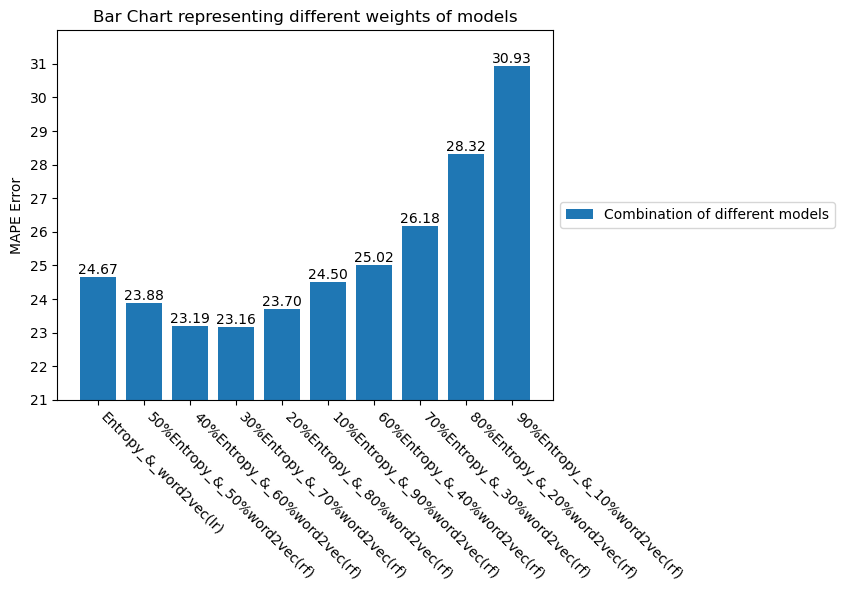

In [6]:
import matplotlib.pyplot as plt
# Create a bar chart
fig, ax = plt.subplots()
bars = ax.bar(df_table['Combination'], df_table['MAPE Error'])
ax.set_ylabel('MAPE Error')
ax.set_title('Bar Chart representing different weights of models')

# Rotate x-labels vertically
ax.set_xticks(range(len(df_table['Combination'])))
ax.set_xticklabels(df_table['Combination'], rotation=-45, ha='left')

# Create legend
legend_labels = ['Combination of different models']
ax.legend(bars, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Set the range and scale of the y-axis
ax.set_ylim(21, 32)
ax.set_yticks(range(21, 32, 1))

# Add percentage labels above the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, "{:.2f}".format(height), 
            ha='center', va='bottom')


plt.show()

In [7]:
question = pd.read_csv('questions.csv', encoding='latin1')
question.head()

,Question,Average_Score
0,*If you had to summarise your approach to mone...,2.58
1,Imagine someone asked you to explain DeFi to t...,3.00
2,Imagine you woke up tomorrow and all of your w...,2.58
3,Reflecting on who you are as a person...\n If ...,2.64
4,Now imagine that you could *invite anyone in t...,2.71


In [8]:
# Function to clean text
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove special characters and digits
    tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens]
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
     
    return ' '.join(tokens)

# Clean the 'Question' column and create a new column 'Cleaned_Question'
question['Cleaned_Question'] = question['Question'].apply(clean_text)

# Print the updated DataFrame
question.head()



,Question,Average_Score,Cleaned_Question
0,*If you had to summarise your approach to mone...,2.58,summarise approach money finances words would...
1,Imagine someone asked you to explain DeFi to t...,3.00,imagine someone asked explain defi would descr...
2,Imagine you woke up tomorrow and all of your w...,2.58,imagine woke tomorrow wealth defi would feel w...
3,Reflecting on who you are as a person...\n If ...,2.64,reflecting person asked best friend describe a...
4,Now imagine that you could *invite anyone in t...,2.71,imagine could invite anyone world dinner would...


In [9]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to apply stemming to a text
def apply_stemming(text):
    tokens = word_tokenize(text)  # Tokenize the text into individual words
    stemmed_tokens = [stemmer.stem(token) for token in tokens]  # Apply stemming to each word
    return ' '.join(stemmed_tokens)  # Join the stemmed tokens back into a single string

# Function to apply lemmatization to a text
def apply_lemmatization(text):
    tokens = word_tokenize(text)  # Tokenize the text into individual words
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Apply lemmatization to each word
    return ' '.join(lemmatized_tokens)  # Join the lemmatized tokens back into a single string

# Apply stemming to the 'text_responses' column
question['stemmed_text'] = question['Cleaned_Question'].apply(apply_stemming)

# Apply lemmatization to the 'text_responses' column
question['lemmatized_text'] = question['Cleaned_Question'].apply(apply_lemmatization)

# Print the updated DataFrame
question.head()


[nltk_data] Downloading package wordnet to /home/faculty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/faculty/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Question,Average_Score,Cleaned_Question,stemmed_text,lemmatized_text
0,*If you had to summarise your approach to mone...,2.58,summarise approach money finances words would...,summaris approach money financ word would tell...,summarise approach money finance word would te...
1,Imagine someone asked you to explain DeFi to t...,3.00,imagine someone asked explain defi would descr...,imagin someon ask explain defi would describ d...,imagine someone asked explain defi would descr...
2,Imagine you woke up tomorrow and all of your w...,2.58,imagine woke tomorrow wealth defi would feel w...,imagin woke tomorrow wealth defi would feel wo...,imagine woke tomorrow wealth defi would feel w...
3,Reflecting on who you are as a person...\n If ...,2.64,reflecting person asked best friend describe a...,reflect person ask best friend describ approac...,reflecting person asked best friend describe a...
4,Now imagine that you could *invite anyone in t...,2.71,imagine could invite anyone world dinner would...,imagin could invit anyon world dinner would in...,imagine could invite anyone world dinner would...


Create a new dataframe with top 50 question ranking referring to the average score.

In [10]:
top_50scores = question.nlargest(50, 'Average_Score')
top_50scores

,Question,Average_Score,Cleaned_Question,stemmed_text,lemmatized_text
5,"Compare the way you approach life, work, and m...",3.71,compare way approach life work money parents g...,compar way approach life work money parent gra...,compare way approach life work money parent gr...
7,One final question! \n \n What is the *coolest...,3.14,one final question coolest interesting thing w...,one final question coolest interest thing worl...,one final question coolest interesting thing w...
56,"Reflecting on what you have told us so far, te...",3.13,reflecting told us far tell us last time came ...,reflect told us far tell us last time came acr...,reflecting told u far tell u last time came ac...
1,Imagine someone asked you to explain DeFi to t...,3.00,imagine someone asked explain defi would descr...,imagin someon ask explain defi would describ d...,imagine someone asked explain defi would descr...
6,"If you had all the money in the world, *what w...",3.00,money world would please explain,money world would pleas explain,money world would please explain
39,*Tell us about the last time you spoiled or tr...,3.00,tell us last time spoiled treated cat,tell us last time spoil treat cat,tell u last time spoiled treated cat
61,Reflect on your answer above . . . And share w...,3.00,reflect answer share us something help work to...,reflect answer share us someth help work towar...,reflect answer share u something help work tow...
81,*Think about your personal relationship with l...,3.00,think personal relationship luxury types items...,think person relationship luxuri type item aes...,think personal relationship luxury type item a...
50,What three words would you use to describe you...,2.90,three words would use describe experience tell...,three word would use describ experi tell us ch...,three word would use describe experience tell ...
72,"*Your task: Bring to life a world with oceans,...",2.90,task bring life world oceans lakes rivers seas...,task bring life world ocean lake river sea str...,task bring life world ocean lake river sea str...


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the stemmed_text column
stemmed_text_vectors = vectorizer.fit_transform(top_50scores['stemmed_text'])

# Get the feature names (keywords)
stemmed_keywords = vectorizer.get_feature_names()

# Fit and transform the lemmatized_text column
lemmatized_text_vectors = vectorizer.fit_transform(top_50scores['lemmatized_text'])

# Get the feature names (keywords)
lemmatized_keywords = vectorizer.get_feature_names()

# Fit and transform the cleaned_text column
cleaned_text_vectors = vectorizer.fit_transform(top_50scores['Cleaned_Question'])

# Get the feature names (keywords)
cleaned_keywords = vectorizer.get_feature_names()

# Print the top 10 keywords for each column
print("Top 10 stemmed keywords:")
print(stemmed_keywords[:10])

print("\nTop 10 lemmatized keywords:")
print(lemmatized_keywords[:10])

print("\nTop 10 cleaned keywords:")
print(cleaned_keywords[:10])


Top 10 stemmed keywords:
['across', 'adopt', 'aesthet', 'agre', 'allow', 'andor', 'answer', 'anyon', 'approach', 'ask']

Top 10 lemmatized keywords:
['across', 'adopt', 'aesthetic', 'agree', 'allow', 'andor', 'answer', 'anyone', 'approach', 'asked']

Top 10 cleaned keywords:
['across', 'adopt', 'aesthetics', 'agree', 'allow', 'andor', 'answer', 'answers', 'anyone', 'approach']


/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
# Function to get n-grams and their frequencies
def get_top_ngrams(text, n, top_k):
    # Generate n-grams
    ngram_list = list(ngrams(text, n))
    # Count the occurrences of each n-gram
    ngram_counts = Counter(ngram_list)
    # Get the top-k most common n-grams
    top_ngrams = ngram_counts.most_common(top_k)
    return top_ngrams


# Get top 10 bigrams and trigrams for each text
top_cleaned_bigrams = get_top_ngrams(top_50scores['Cleaned_Question'], 2, 10)
top_cleaned_trigrams = get_top_ngrams(top_50scores['Cleaned_Question'], 3, 10)

top_stemmed_bigrams = get_top_ngrams(top_50scores['stemmed_text'], 2, 10)
top_stemmed_trigrams = get_top_ngrams(top_50scores['stemmed_text'], 3, 10)

top_lemmatized_bigrams = get_top_ngrams(top_50scores['lemmatized_text'], 2, 10)
top_lemmatized_trigrams = get_top_ngrams(top_50scores['lemmatized_text'], 3, 10)

# Print the results
print("Top 10 Cleaned Bigrams:", top_cleaned_bigrams)
print("Top 10 Cleaned Trigrams:", top_cleaned_trigrams)

print("Top 10 Stemmed Bigrams:", top_stemmed_bigrams)
print("Top 10 Stemmed Trigrams:", top_stemmed_trigrams)

print("Top 10 Lemmatized Bigrams:", top_lemmatized_bigrams)
print("Top 10 Lemmatized Trigrams:", top_lemmatized_trigrams)


Top 10 Cleaned Bigrams: [(('compare way approach life work money parents grandparents tell us think big differences', 'one final question coolest interesting thing world money finance youve recently seen find coolinteresting'), 1), (('one final question coolest interesting thing world money finance youve recently seen find coolinteresting', 'reflecting told us far tell us last time came across something new food nutrition space really grabbed attention'), 1), (('reflecting told us far tell us last time came across something new food nutrition space really grabbed attention', 'imagine someone asked explain defi would describe defi promise nothing else would warn'), 1), (('imagine someone asked explain defi would describe defi promise nothing else would warn', 'money world would please explain'), 1), (('money world would please explain', 'tell us last time spoiled treated cat'), 1), (('tell us last time spoiled treated cat', 'reflect answer share us something help work towards inside bea

In [14]:
# Combine all the cleaned text entries into a single string
combined_text = ' '.join(top_50scores['Cleaned_Question'])

# Function to extract n-grams and count their frequencies
def extract_ngrams(text, n):
    # Tokenize the text into individual words
    tokens = nltk.word_tokenize(text)

    # Extract n-grams
    ngrams_list = list(ngrams(tokens, n, pad_left=True, pad_right=True))

    # Count the frequencies of n-grams
    ngrams_freq = Counter(ngrams_list)

    return ngrams_freq

# Define the number of words in the n-grams (2 for bigrams, 3 for trigrams)
n_bigram = 2
n_trigram = 3

# Extract bigrams and count their frequencies
bigram_freq = extract_ngrams(combined_text, n_bigram)

# Extract trigrams and count their frequencies
trigram_freq = extract_ngrams(combined_text, n_trigram)

# Get the top 10 bigrams and their frequencies
top_bigrams = bigram_freq.most_common(10)

# Get the top 10 trigrams and their frequencies
top_trigrams = trigram_freq.most_common(10)

# Create a DataFrame to store the results
df_top_ngrams = pd.DataFrame({
    'Bigram': [x[0] for x in top_bigrams],
    'Bigram Frequency': [x[1] for x in top_bigrams],
    'Trigram': [x[0] for x in top_trigrams],
    'Trigram Frequency': [x[1] for x in top_trigrams]
})

# Print the DataFrame with the top-frequency bigrams and trigrams
df_top_ngrams


,Bigram,Bigram Frequency,Trigram,Trigram Frequency
0,"(tell, us)",16,"(please, explain, answer)",4
1,"(please, explain)",5,"(think, back, last)",3
2,"(approach, life)",4,"(would, tell, us)",3
3,"(last, time)",4,"(tell, us, think)",2
4,"(three, words)",4,"(one, final, question)",2
5,"(explain, answer)",4,"(tell, us, last)",2
6,"(food, choices)",3,"(us, last, time)",2
7,"(think, back)",3,"(last, time, came)",2
8,"(back, last)",3,"(time, came, across)",2
9,"(describe, approach)",3,"(came, across, something)",2


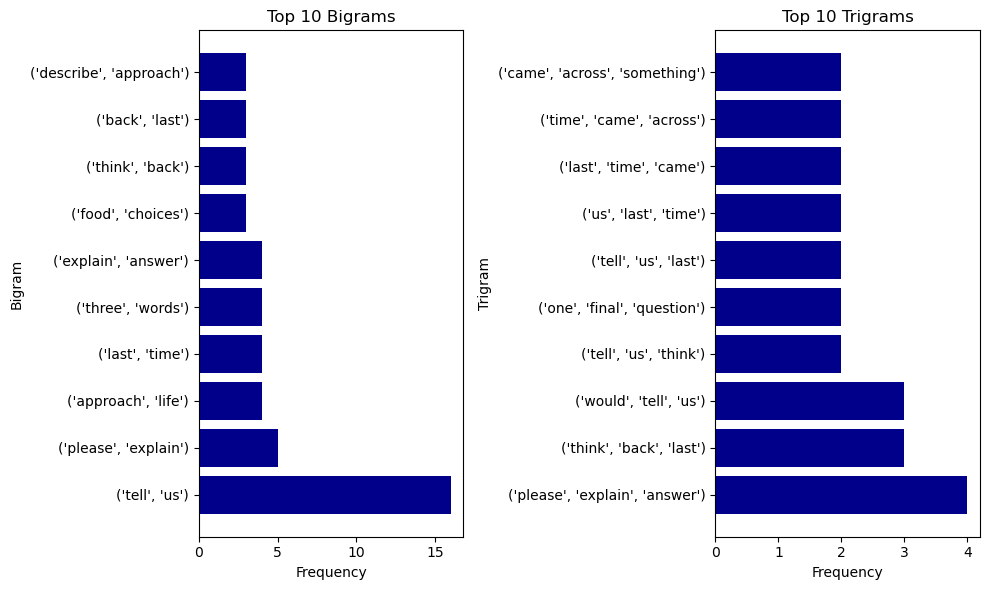

In [15]:

# 'df_top_ngrams' containing the top 10 bigrams and trigrams

# Convert the tuples to strings
df_top_ngrams['Bigram'] = df_top_ngrams['Bigram'].astype(str)
df_top_ngrams['Trigram'] = df_top_ngrams['Trigram'].astype(str)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart for bigrams
plt.subplot(1, 2, 1)  # Create a subplot for bigrams
plt.barh(df_top_ngrams['Bigram'], df_top_ngrams['Bigram Frequency'], color='darkblue')

plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top 10 Bigrams')

# Plot the bar chart for trigrams
plt.subplot(1, 2, 2)  # Create a subplot for trigrams
plt.barh(df_top_ngrams['Trigram'], df_top_ngrams['Trigram Frequency'], color='darkblue')

plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.title('Top 10 Trigrams')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 kB 6.7 MB/s eta 0:00:0000:01


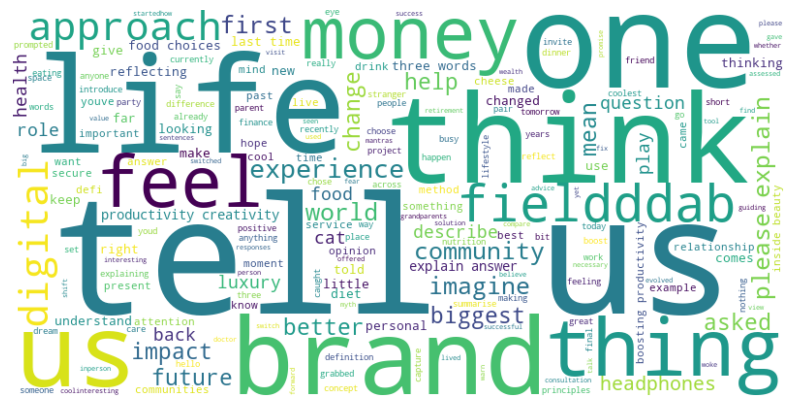

In [65]:
# Select the column of text questions (replace 'Text_Question' with your column name)
text_questions = question['Cleaned_Question']

# Concatenate all text questions into a single string
combined_text = ' '.join(text_questions)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by bash)


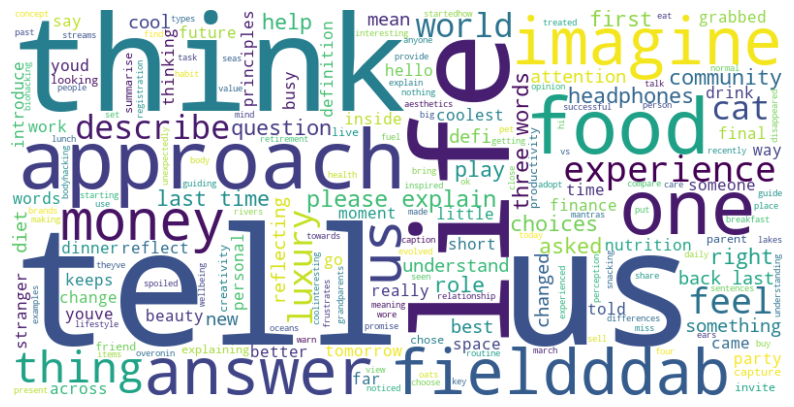

In [21]:

# Select the column of text questions (replace 'Text_Question' with your column name)
text_questions = top_50scores['Cleaned_Question']

# Concatenate all text questions into a single string
combined_text = ' '.join(text_questions)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
